In [1]:
!pip install pandas
!pip install matplotlib
!pip install pandas_datareader

In [2]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt

In [3]:
# Download historical data for required stocks
tickers = ["MSFT","AMZN","AAPL","CSCO","IBM","FB"]

In [4]:
close_prices = pd.DataFrame() # dataframe to store close price of each ticker
attempt = 0 # initializing passthrough variable
drop = [] # initializing list to store tickers whose close price was successfully extracted

In [5]:
while len(tickers) != 0 and attempt <= 5:
    tickers = [j for j in tickers if j not in drop] # removing stocks whose data has been extracted from the ticker list
    for i in range(len(tickers)):
        try:
            temp = pdr.get_data_yahoo(tickers[i],datetime.date.today()-datetime.timedelta(3650),datetime.date.today())
            temp.dropna(inplace = True)
            close_prices[tickers[i]] = temp["Adj Close"]
            drop.append(tickers[i])       
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1

In [14]:
close_prices.shape

(2515, 6)

In [15]:
close_prices.head(10)

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2009-12-21,24.022272,132.789993,24.640015,18.434599,94.214439,38.23
2009-12-22,24.258406,133.750000,24.904774,18.520380,95.151863,38.23
2009-12-23,24.337109,138.940002,25.121056,18.543779,95.203102,38.23
2009-12-24,24.400082,138.470001,25.983706,18.684132,95.620552,38.23
2009-12-28,24.533884,139.309998,26.303152,18.777714,96.894806,38.23
2009-12-29,24.707052,139.410004,25.991158,18.793306,96.557938,38.23
2009-12-30,24.368599,136.490005,26.306877,18.855690,97.085197,38.23
2009-12-31,23.990791,134.520004,26.193771,18.668539,95.862190,38.23
2010-01-04,24.360727,133.899994,26.601469,19.253393,96.997330,38.23


In [16]:
close_prices.tail(10)

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2019-12-04,149.850006,1760.689941,261.739990,43.889999,131.990005,198.710007
2019-12-05,149.929993,1740.479980,265.579987,43.520000,131.910004,199.360001
2019-12-06,151.750000,1751.599976,270.709991,43.840000,133.220001,201.050003
2019-12-09,151.360001,1749.510010,266.920013,43.900002,133.919998,201.339996
2019-12-10,151.130005,1739.209961,268.480011,44.099998,133.910004,200.869995
2019-12-11,151.699997,1748.719971,270.769989,44.279999,133.759995,202.259995
2019-12-12,153.240005,1760.329956,271.459991,45.669998,135.320007,196.750000
2019-12-13,154.529999,1760.939941,275.149994,45.299999,134.210007,194.110001
2019-12-16,155.529999,1769.209961,279.859985,45.980000,134.130005,197.919998


In [7]:
# Handling NaN Values
close_prices.fillna(method='bfill',axis=0,inplace=True) # Replaces NaN values with the next valid value along the column

In [8]:
daily_return = close_prices.pct_change() # Creates dataframe with daily return for each stock

In [17]:
daily_return.shape

(2515, 6)

In [18]:
daily_return.head(10)

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2009-12-21,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-22,0.009830,0.007230,0.010745,0.004653,0.009950,0.0
2009-12-23,0.003244,0.038804,0.008684,0.001263,0.000538,0.0
2009-12-24,0.002588,-0.003383,0.034340,0.007569,0.004385,0.0
2009-12-28,0.005484,0.006066,0.012294,0.005009,0.013326,0.0
2009-12-29,0.007058,0.000718,-0.011861,0.000830,-0.003477,0.0
2009-12-30,-0.013699,-0.020945,0.012147,0.003319,0.005461,0.0
2009-12-31,-0.015504,-0.014433,-0.004299,-0.009925,-0.012597,0.0
2010-01-04,0.015420,-0.004609,0.015565,0.031328,0.011841,0.0


In [19]:
daily_return.tail(10)

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2019-12-04,0.003617,-0.005237,0.008826,-0.008808,-0.000984,-0.000553
2019-12-05,0.000534,-0.011478,0.014671,-0.008430,-0.000606,0.003271
2019-12-06,0.012139,0.006389,0.019316,0.007353,0.009931,0.008477
2019-12-09,-0.002570,-0.001193,-0.014000,0.001369,0.005254,0.001442
2019-12-10,-0.001520,-0.005887,0.005844,0.004556,-0.000075,-0.002334
2019-12-11,0.003772,0.005468,0.008529,0.004082,-0.001120,0.006920
2019-12-12,0.010152,0.006639,0.002548,0.031391,0.011663,-0.027242
2019-12-13,0.008418,0.000347,0.013593,-0.008102,-0.008203,-0.013418
2019-12-16,0.006471,0.004696,0.017118,0.015011,-0.000596,0.019628


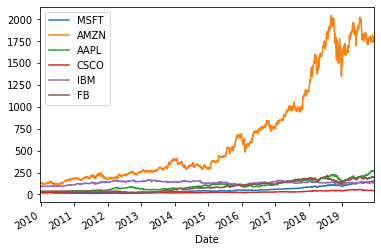

In [9]:
# Data vizualization
close_prices.plot() # Plot of all the stocks superimposed on the same chart

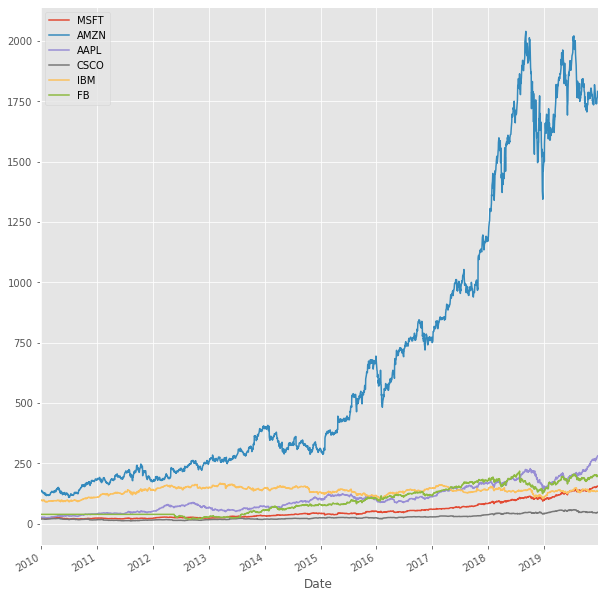

In [22]:
fig, ax = plt.subplots(figsize=(10, 11))
close_prices.plot(ax=ax)

In [23]:
cp_standardized = (close_prices - close_prices.mean())/close_prices.std() # Standardization

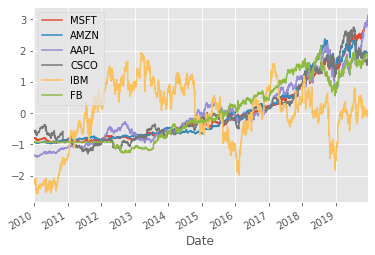

In [24]:
cp_standardized.plot() # Plot of all the stocks standardized and superimposed on the same chart

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66080c5490>,
      dtype=object)

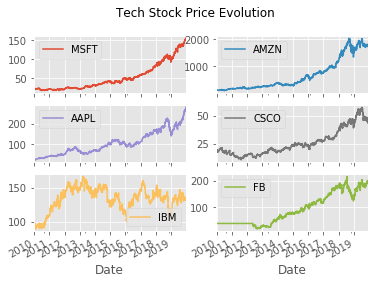

In [25]:
close_prices.plot(subplots=True, layout = (3,2), title = "Tech Stock Price Evolution", grid =True) # Subplots of the stocks

<BarContainer object of 6 artists>

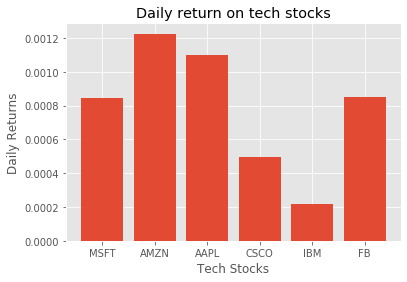

In [26]:
# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on tech stocks", xlabel="Tech Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean())